In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import pandas_datareader as web
%matplotlib inline

In [19]:
esg_csv = Path("Resources/esg_stock_data.csv")
sin_csv = Path("Resources/sin_stock_data.csv")
sp500_with_esg_rating = pd.read_csv("Resources/sp500_with_esg.csv")

In [3]:
esg_df = pd.read_csv(esg_csv, infer_datetime_format=True, parse_dates=True)
sin_df = pd.read_csv(sin_csv, infer_datetime_format=True, parse_dates=True)

In [4]:
esg_df = esg_df.rename(columns={"Unnamed: 0": "Dates"})
sin_df = sin_df.rename(columns={"Unnamed: 0": "Dates"})

In [5]:
esg_df['Dates'] = pd.to_datetime(esg_df['Dates'], utc=True).dt.date
sin_df['Dates'] = pd.to_datetime(sin_df['Dates'], utc = True).dt.date

In [6]:
esg_df = esg_df.set_index("Dates")
sin_df = sin_df.set_index("Dates")

In [7]:
price_data = web.get_data_yahoo(esg_df.columns,
                               start = '2008-01-02',
                               end = '2020-10-30')

In [8]:
sin_price_data = web.get_data_yahoo(sin_df.columns,
                               start = '2008-01-02',
                               end = '2020-10-30')

In [9]:
esg_price_data = price_data["Adj Close"]
sin_price_data = sin_price_data["Adj Close"]

In [14]:
sin_price_data = sin_price_data.dropna(axis=1)

In [16]:
esg_daily_returns = esg_price_data.pct_change().dropna()
sin_daily_returns = sin_price_data.pct_change().dropna()

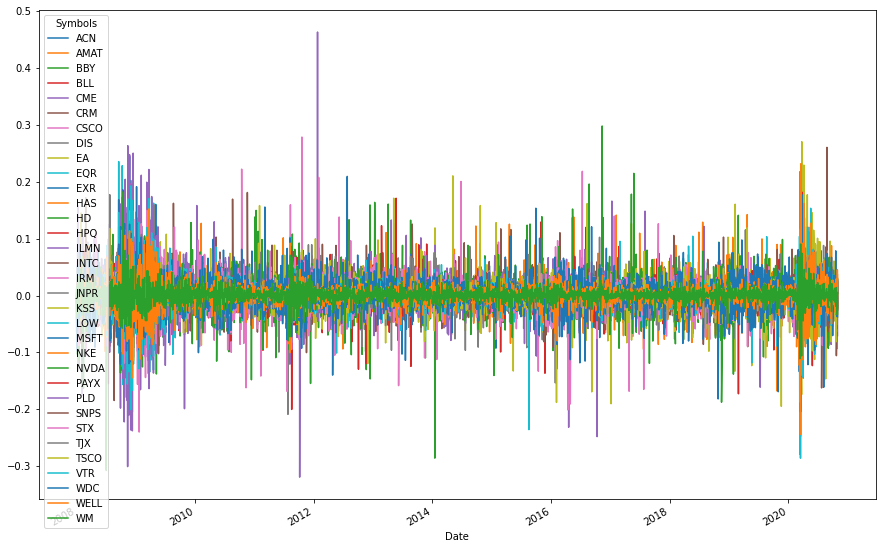

In [17]:
esg_daily_returns.plot(figsize= (15,10))

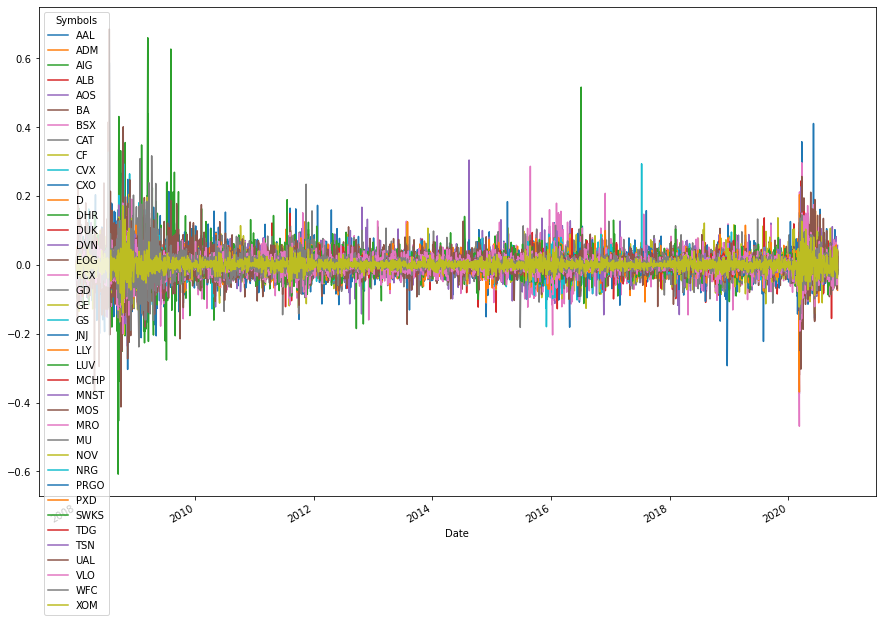

In [18]:
sin_daily_returns.plot(figsize=(15,10))

In [20]:
sp500_with_esg_rating.drop(columns=["Unnamed: 0"], inplace=True)
sp500_with_esg_rating.dropna(inplace=True)
sp500_with_esg_rating.drop([505], inplace=True)


In [21]:
data_sorted = sp500_with_esg_rating.sort_values("ESG Score")
esg_data = data_sorted.nsmallest(90, "ESG Score")
sin_data = data_sorted.nlargest(90, "ESG Score")

In [22]:
esg_data = esg_data.set_index("Symbol")
esg_symbols = pd.melt(esg_price_data).groupby("Symbols").mean()
esg_symbols.reset_index(inplace=True)

In [23]:
esg_symbols.rename(columns={"Symbols": "Symbol"}, inplace=True)

In [29]:
esg_data.reset_index(inplace=True)

In [30]:
esg_data

Symbol  ESG Score
0    CBRE        9.0
1     TEL        9.0
2     PLD       10.0
3    KEYS       10.0
4     ACN       11.0
..    ...        ...
85    DRE       16.0
86   JNPR       16.0
87      L       16.0
88    IRM       16.0
89    NKE       16.0

[90 rows x 2 columns]

In [31]:
esg_score_data = pd.merge(esg_data,esg_symbols).drop("value", axis=1).set_index("Symbol")

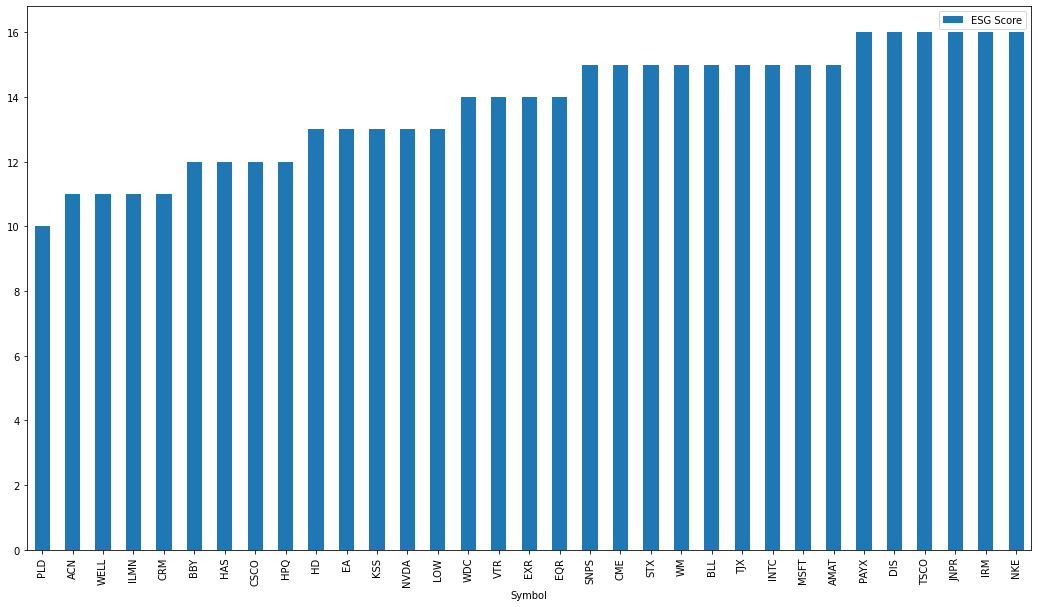

In [32]:
# esg_data.columns
esg_score_data.plot(kind="bar", figsize=(18,10))



In [33]:
sin_symbols = pd.melt(sin_price_data).groupby("Symbols").mean()
sin_symbols.reset_index(inplace=True)

In [34]:
sin_symbols.rename(columns={"Symbols": "Symbol"}, inplace=True)

In [35]:
sin_score_data = pd.merge(sin_data,sin_symbols).drop("value", axis=1).set_index("Symbol")

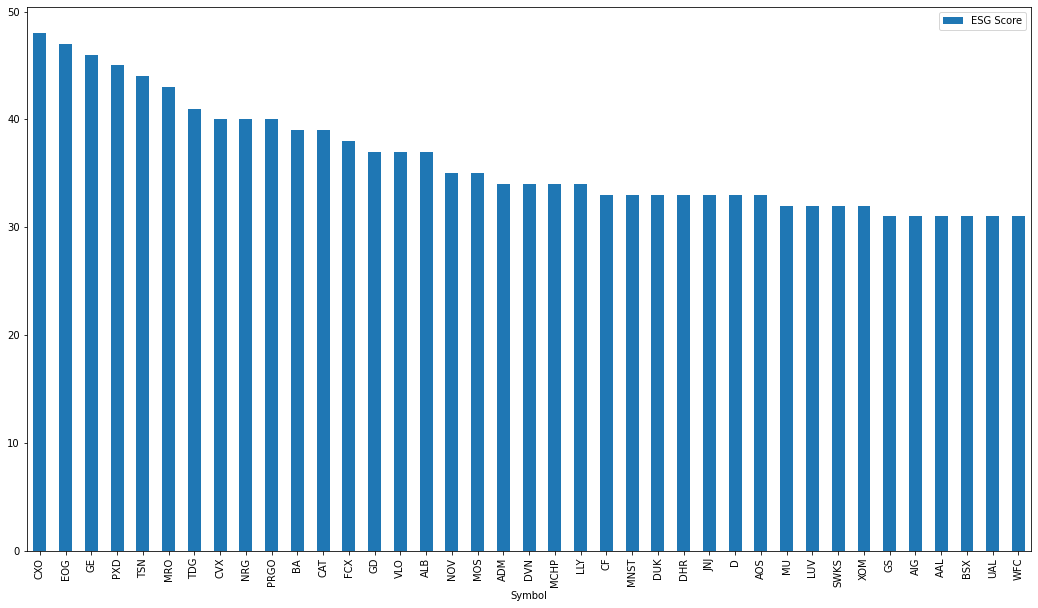

In [36]:
sin_score_data.plot(kind="bar", figsize= (18,10))

In [44]:
esg_price_data.to_csv("Resources/esg_price_data.csv")
sin_price_data.to_csv("Resources/sin_price_data.csv")
esg_daily_returns.to_csv("Resources/esg_daily_returns.csv")
sin_daily_returns.to_csv("Resources/sin_daily_returns.csv")
esg_score_data.to_csv("Resources/esg_score_data.csv")
sin_score_data.to_csv("Resources/sin_score_data.csv")
spy_prices.to_csv("Resources/spy_prices.csv")

In [40]:
spy_data = web.get_data_yahoo("SPY",
                               start = '2008-01-02',
                               end = '2020-10-30')

In [42]:
spy_prices = spy_data["Adj Close"]

In [43]:
spy_prices

Date
2008-01-02    111.647873
2008-01-03    111.593925
2008-01-04    108.859154
2008-01-07    108.766731
2008-01-08    107.010330
                 ...    
2020-10-26    339.390015
2020-10-27    338.220001
2020-10-28    326.660004
2020-10-29    329.980011
2020-10-30    326.540009
Name: Adj Close, Length: 3232, dtype: float64